# Frequency Response of 2nd Order System


## Details


Rajas Mehendale

18CHE160

CET 1703 - Chemical Process Control

T.Y. B. Chem. Engg



## Obtaining Equation


For a second order system, the transfer function is:

$$G(s) = \frac{{K}_{P}}{ {\tau }^{2}{s}^{2} + 2\tau \zeta s +1}$$

Using s= $j \omega$

$$G(j \omega) = \frac{{K}_{P}}{ {\tau }^{2}{j}^{2}{\omega }^{2} + 2\tau \zeta (j \omega) +1}$$

Since ${j}^{2} = -1$

$$G(j \omega) = \frac{{K}_{P}}{ -{\tau }^{2}{\omega }^{2} + 2\tau \zeta (j \omega) +1}$$

Rearranging the real and imaginary parts

$$G(j \omega) = \frac{{K}_{P}}{ (1 -{\tau }^{2}{\omega }^{2}) + (2\tau \zeta \omega )j}$$


Multiplying with the complex conjugate

$$G(j \omega) = \frac{{K}_{P}}{ (1 -{\tau }^{2}{\omega }^{2}) + (2\tau \zeta \omega )j} * \frac{(1 -{\tau }^{2}{\omega }^{2}) - (2\tau \zeta \omega )j}{(1 -{\tau }^{2}{\omega }^{2}) - (2\tau \zeta \omega )j}$$




Let a = $(1 -{\tau }^{2}{\omega }^{2})$
and b = $(-2\tau \zeta \omega )$

$$G(j \omega) = \frac{{K}_{P}}{ a - bj} * \frac{a + bj}{a + bj}$$

$$G(j \omega) = K_P * (\frac{a +bj}{ {a}^{2} + {b}^{2}})$$


Amplitude is = $\frac{K_P}{\sqrt{({a}^{2}+ {b}^{2})}}$

Phase angle is $\phi = {tan}^{-1}(\frac{b}{a})$

## Plotting the Amplitude Response

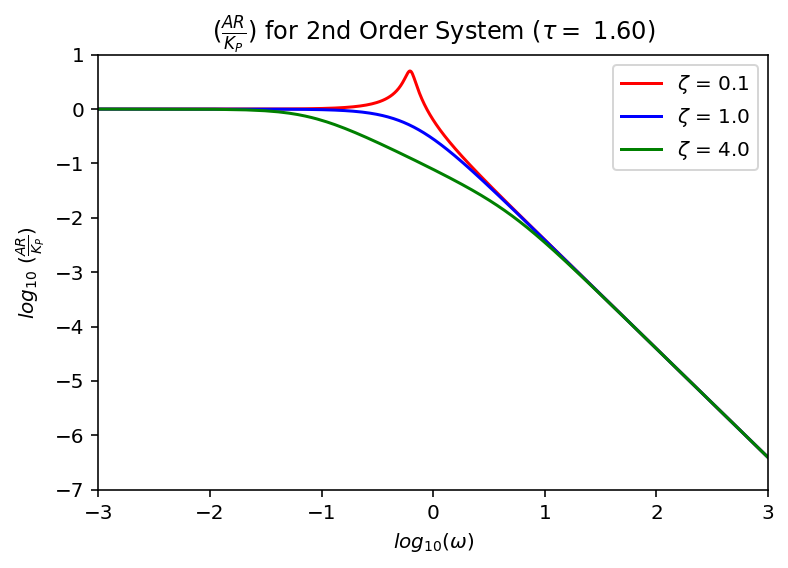

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import display

%config InlineBackend.figure_format = 'retina'

tau = 160.0/100.0
def response(w,z):
    Kp = 1.0
    a = 1- (tau**2)*(w**2)
    b = -2*tau*z*w
    sol = Kp/np.sqrt(a**2+b**2)
    sol1 = np.arctan(b/a)
    return sol

zeta = [0.1,1,4]
plt.figure();
plt.plot(np.log10(w), np.log10(response(w,zeta[0])), 'r', label = r"$\zeta$ = %.1f" %(zeta[0]))
plt.plot(np.log10(w), np.log10(response(w,zeta[1])), 'b', label = r"$\zeta$ = %.1f" %(zeta[1]))
plt.plot(np.log10(w), np.log10(response(w,zeta[2])), 'g', label = r"$\zeta$ = %.1f" %(zeta[2]))
plt.ylim([-7,1]); 
plt.xlim([-3,3]);
plt.xlabel(r"${log}_{10}(\omega )$", fontsize=10)
plt.ylabel(r"${log}_{10} \ (\frac{AR}{K_P} )$", fontsize=10)
plt.title(r"$(\frac{AR}{K_P}$)"+ " for 2nd Order System (" + r"$\tau =$ %.2f)"% (tau), fontsize=12)
plt.legend();


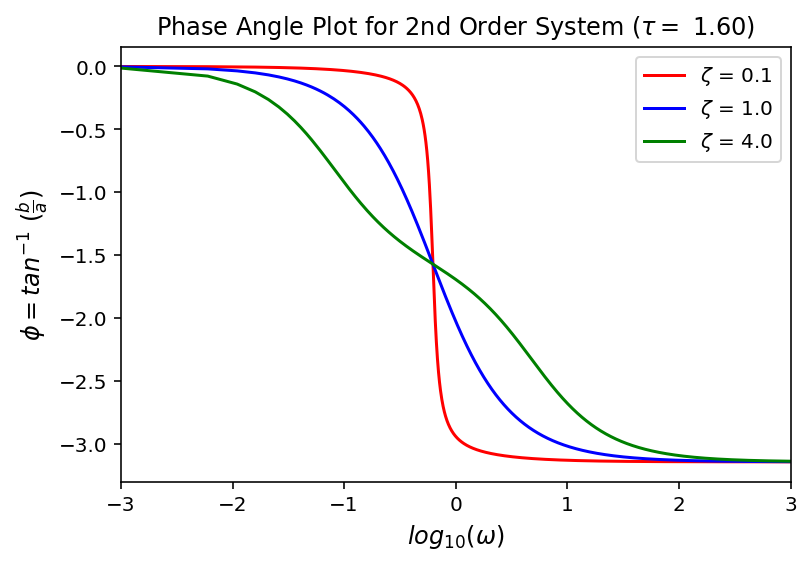

In [2]:
def phicalc1(w,z):
    Kp = 1.0
    a = 1- (tau**2)*(w**2)
    b = -2*tau*z*w
    sol1 = Kp/np.sqrt(a**2+b**2)
    sol = np.arctan(b/a)
    if w > 1/tau:
        sol = sol-np.pi
    return sol
phicalc = np.vectorize(phicalc1)
plt.figure();

w1 = np.linspace(0.001,1000,200000)
plt.plot(np.log10(w1),phicalc(w1,zeta[0]), 'r', label = r"$\zeta$ = %.1f" %(zeta[0]))
plt.plot(np.log10(w1),phicalc(w1,zeta[1]), 'b', label = r"$\zeta$ = %.1f" %(zeta[1]))
plt.plot(np.log10(w1),phicalc(w1,zeta[2]), 'g', label = r"$\zeta$ = %.1f" %(zeta[2]))
#plt.ylim([-7,1]); 
plt.xlim([-3,3]);
plt.xlabel(r"${log}_{10}(\omega )$", fontsize=12)
plt.ylabel(r"$\phi = {tan}^{-1} \ (\frac{b}{a})$", fontsize=12)
plt.title("Phase Angle Plot"+ " for 2nd Order System (" + r"$\tau =$ %.2f)"% (tau), fontsize=12)
plt.legend();

The sign of $\phi$ flips at the corner frequency

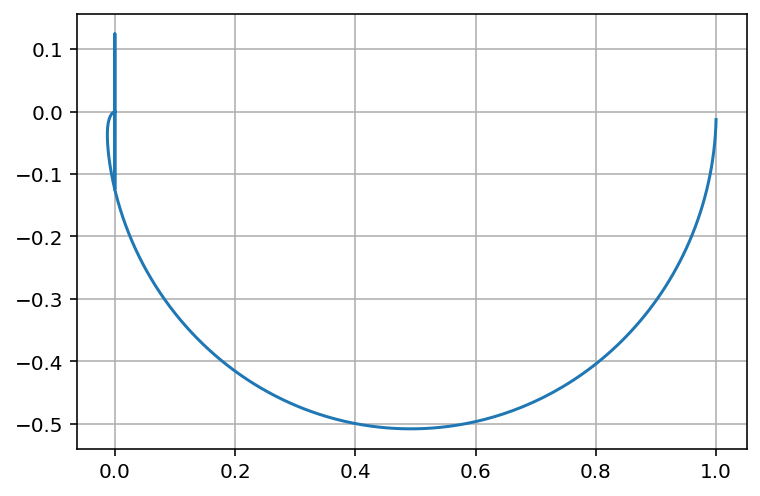

In [17]:
w1 = np.linspace(0.001,100,100000)
x1 = response(w1,zeta[2])
y1= phicalc(w1,zeta[2])
plt.figure();
plt.plot(x1*np.cos(y1),x1*np.sin(y1) )
plt.grid()